In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error , mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')
data = pd.read_excel("merc.xlsx")
df = data.copy()

In [2]:
df.head()

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          13119 non-null  int64  
 1   price         13119 non-null  int64  
 2   transmission  13119 non-null  object 
 3   mileage       13119 non-null  int64  
 4   tax           13119 non-null  int64  
 5   mpg           13119 non-null  float64
 6   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(1)
memory usage: 717.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,13119.0,2017.296288,2.224709,1970.0,2016.0,2018.0,2019.0,2020.0
price,13119.0,24698.596920,11842.675542,650.0,17450.0,22480.0,28980.0,159999.0
mileage,13119.0,21949.559037,21176.512267,1.0,6097.5,15189.0,31779.5,259000.0
tax,13119.0,129.972178,65.260286,0.0,125.0,145.0,145.0,580.0
mpg,13119.0,55.155843,15.220082,1.1,45.6,56.5,64.2,217.3
engineSize,13119.0,2.071530,0.572426,0.0,1.8,2.0,2.1,6.2


In [5]:
df.isnull().sum()

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

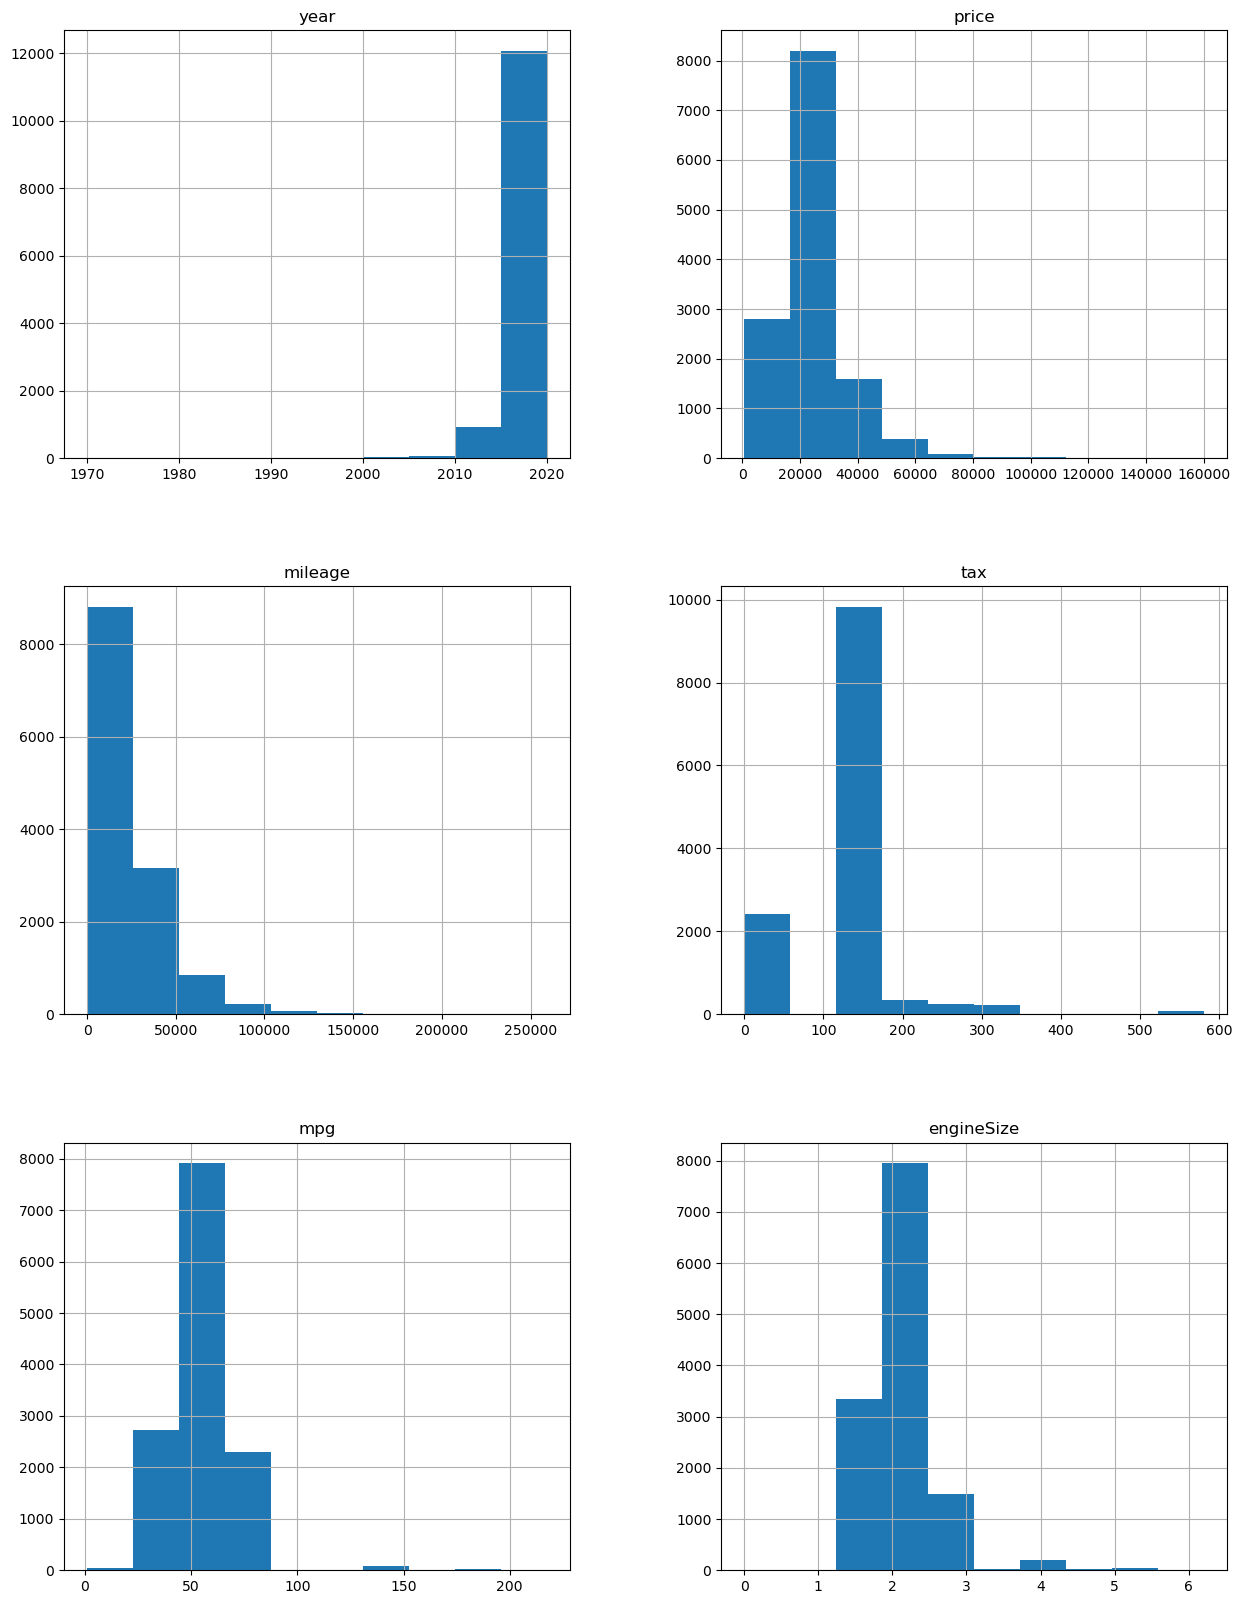

In [6]:
df.hist(figsize = (15,20));

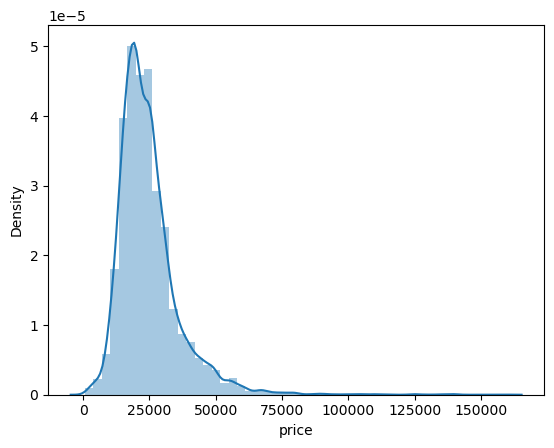

In [7]:
sns.distplot(df["price"]);

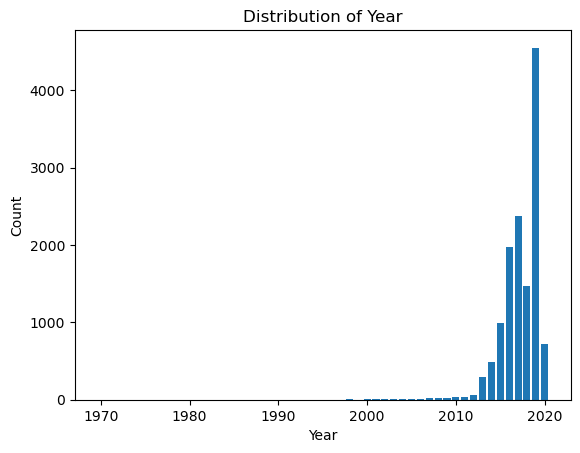

In [8]:
plt.bar(df["year"].value_counts().index, df["year"].value_counts().values)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of Year")
plt.show()

In [9]:
df.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


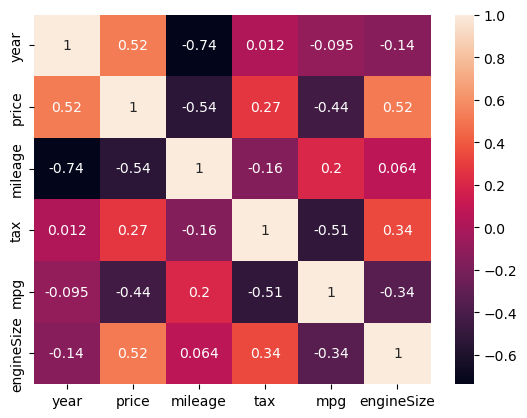

In [10]:
sns.heatmap(df.corr(), annot=True);

In [11]:
df.sort_values("price" , ascending = False)

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [12]:
len(df) * 0.01

131.19

In [13]:
df.sort_values("price" , ascending = False).iloc[131:]

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [14]:
df.sort_values("price" , ascending = False).iloc[131:]

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [15]:
df = data.sort_values("price" , ascending = False).iloc[131:]

In [16]:
df

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [17]:
df.groupby("year").mean().price

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [18]:
df = df[df.year != 1970]

In [19]:
df.groupby("year").mean()

,price,mileage,tax,mpg,engineSize
year,,,,,
1997,9995.000000,76000.000000,255.000000,28.200000,3.200000
1998,8605.000000,76347.750000,262.500000,28.925000,3.450000
1999,5995.000000,34000.000000,145.000000,24.600000,3.200000
2000,5743.333333,89648.666667,268.333333,26.333333,3.200000
2001,4957.900000,72955.100000,347.500000,28.140000,2.870000
2002,5820.444444,57391.111111,350.555556,27.877778,3.522222
2003,4878.000000,88777.714286,300.000000,29.485714,3.028571
2004,4727.615385,94363.461538,312.307692,31.838462,2.530769
2005,4426.111111,80651.333333,303.333333,35.344444,2.377778


In [20]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [21]:
df = df.drop("transmission" , axis = 1)

In [22]:
y = df["price"]
X = df.drop("price" , axis = 1)

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 42)

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
X_train.shape

(9090, 5)

In [27]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam" , loss = "mse")

In [28]:
model.fit(X_train , y_train , 
          validation_data = (X_test , y_test) ,
          batch_size = 250 , epochs = 300)

Epoch 1/300
37/37 [==============================] - 2s 7ms/step - loss: 674382080.0000 - val_loss: 682885632.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 674352704.0000 - val_loss: 682842752.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 674267712.0000 - val_loss: 682683456.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 673952576.0000 - val_loss: 682116032.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 672894592.0000 - val_loss: 680299968.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 669895424.0000 - val_loss: 675626944.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 662923584.0000 - val_loss: 665537600.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 648888960.0000 - val_loss: 646422528.0000
Epoch 9/300
37/37 [==============================] - 0s 4ms/step - loss: 6239287

In [29]:
loss_data = pd.DataFrame(model.history.history)

In [30]:
loss_data.head()

,loss,val_loss
0,674382080.0,682885632.0
1,674352704.0,682842752.0
2,674267712.0,682683456.0
3,673952576.0,682116032.0
4,672894592.0,680299968.0


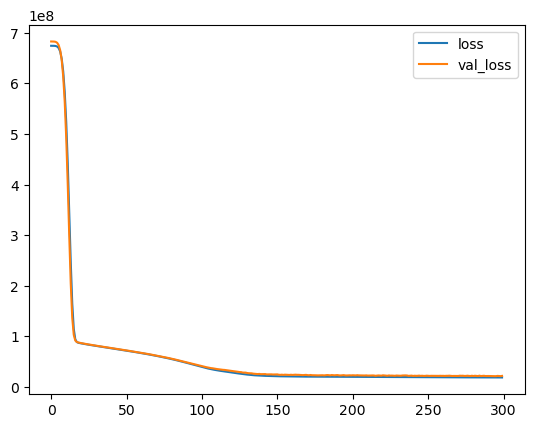

In [31]:
loss_data.plot();

In [32]:
predict_ = model.predict(X_test)

122/122 [==============================] - 0s 2ms/step


In [33]:
predict_

array([[23588.033],
       [20870.955],
       [13771.777],
       ...,
       [19371.78 ],
       [33018.89 ],
       [24005.287]], dtype=float32)

In [34]:
mean_absolute_error(y_test , predict_)

3272.618659516986

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


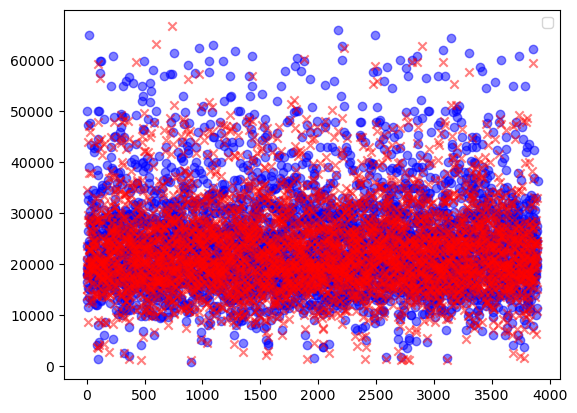

In [35]:
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='blue', marker='o')
plt.scatter(range(len(predict_)), predict_, alpha=0.5, color='red', marker='x')
plt.legend()
plt.show()